In [1]:
import pandas as pd

dataset = pd.read_csv('allUsers.lcl.csv')
dataset = dataset.drop(0)
dataset.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?


In [2]:
dataset.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


## Build Skeleton approach

In [3]:
parents = {}
keys = ['X', 'Y', 'Z']

for k in keys:
    for i in range(1, 12):
        parents[str(k) + str(i)] = str(k) + str(i-1)

In [4]:
print(parents)

{'X1': 'X0', 'X2': 'X1', 'X3': 'X2', 'X4': 'X3', 'X5': 'X4', 'X6': 'X5', 'X7': 'X6', 'X8': 'X7', 'X9': 'X8', 'X10': 'X9', 'X11': 'X10', 'Y1': 'Y0', 'Y2': 'Y1', 'Y3': 'Y2', 'Y4': 'Y3', 'Y5': 'Y4', 'Y6': 'Y5', 'Y7': 'Y6', 'Y8': 'Y7', 'Y9': 'Y8', 'Y10': 'Y9', 'Y11': 'Y10', 'Z1': 'Z0', 'Z2': 'Z1', 'Z3': 'Z2', 'Z4': 'Z3', 'Z5': 'Z4', 'Z6': 'Z5', 'Z7': 'Z6', 'Z8': 'Z7', 'Z9': 'Z8', 'Z10': 'Z9', 'Z11': 'Z10'}


In [5]:
import numpy as np
linhas, cols = dataset.shape
colnames = dataset.columns
print(colnames)
new_dataset = dataset
#print(dataset.isin(['?']).sum())
print(linhas, cols)
print('Started')
for linha in range(0, linhas):
    for col in range(2, cols):
        if(new_dataset.loc[linha+1, colnames[col]] == '?'):
            new_dataset.at[linha+1, colnames[col]] = new_dataset.loc[linha+1, parents[colnames[col]]]
            #new_dataset.at[linha+1, colnames[col]] = 0
 
print(linha, col)
print('Finished')

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')
78095 38
Started
78094 37
Finished


In [6]:
new_dataset.tail()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,87.7333643096221,61.2163626180662,-62.1262783028233,87.7333643096221,61.2163626180662,-62.1262783028233
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,78.2298473919132,33.0784071753174,-45.2495433686171,78.2298473919132,33.0784071753174,-45.2495433686171
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,78.591554010542,32.32773753847,-46.1665560916632,78.591554010542,32.32773753847,-46.1665560916632
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,88.4657093720691,60.0507908377745,-63.2216259324485,88.4657093720691,60.0507908377745,-63.2216259324485,88.4657093720691,60.0507908377745,-63.2216259324485
78095,5,14,27.898705,108.092877,11.107857,-30.031402,77.740235,-17.453099,-1.091566,122.827638,...,-63.0265744155222,78.8796525666014,31.6030997578398,-47.0137357205196,78.8796525666014,31.6030997578398,-47.0137357205196,78.8796525666014,31.6030997578398,-47.0137357205196


In [7]:
cols = new_dataset.shape[1]

colnames = new_dataset.columns
for i in range(2,len(new_dataset.columns)):
    new_dataset[colnames[i]] = pd.to_numeric(new_dataset[colnames[i]], downcast='float')

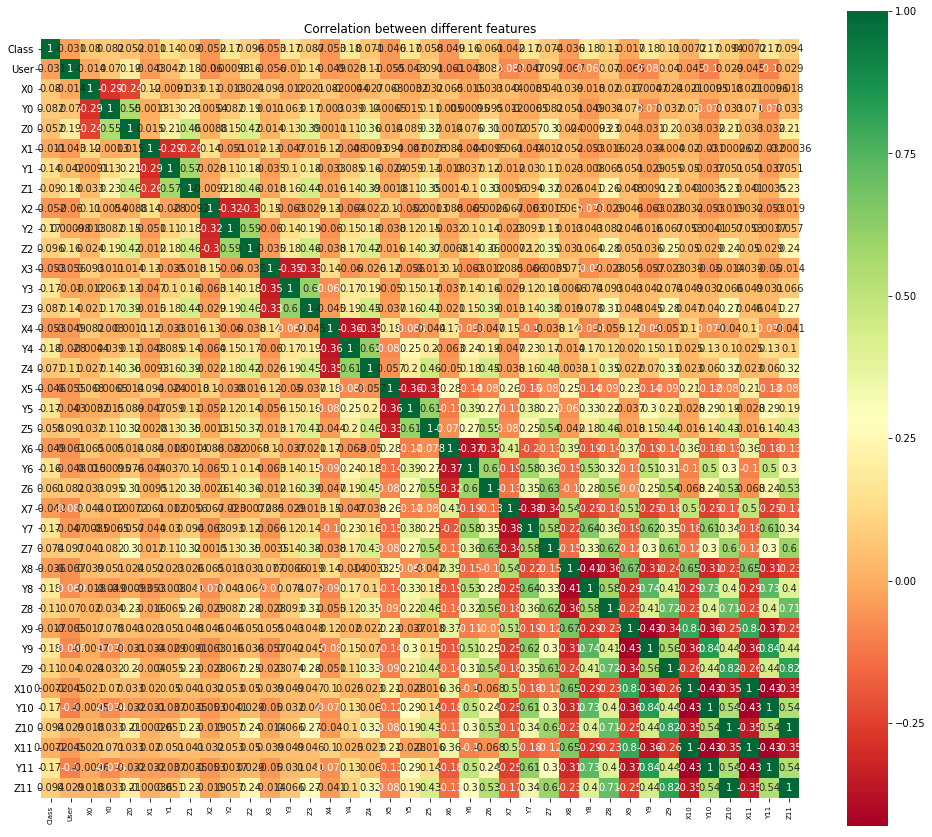

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#print(new_dataset.isin(['?']).sum())
#new_dataset = new_dataset.convert_objects(convert_numeric=True)
correlation = new_dataset.corr()
plt.figure(figsize=(17,15))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn',xticklabels=True,yticklabels=True)

g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), size=7, rotation =90)
plt.title('Correlation between different features')
plt.show()

## Plot data

2505


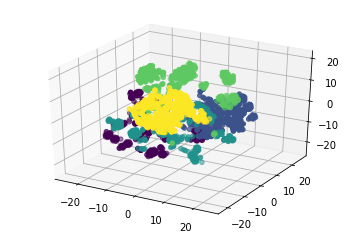

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

dados = new_dataset.sort_values('Class')
dados_print = []
classes = []
atual = 1
cont = 0
shape = dados.shape
AMOSTRA = 500
for i in range(1, shape[0]):
    if cont <= AMOSTRA and atual == dados.loc[i, 'Class']:
        dados_print.append(dados.loc[i, :])
        classes.append(dados.loc[i, 'Class'])
        cont+=1
    elif cont > AMOSTRA:
        cont = 0
        atual = (atual + 1) % 6
dados_print2 = dados_print
AUXLEN = len(dados_print)
print(len(dados_print))
model = TSNE(learning_rate=200, n_components=3)
tsne_features = model.fit_transform(dados_print)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
zs = tsne_features[:, 2]
# Scatter plot, coloring by variety_numbers
ax.scatter(xs, ys, zs, c=np.array(classes))
plt.show()


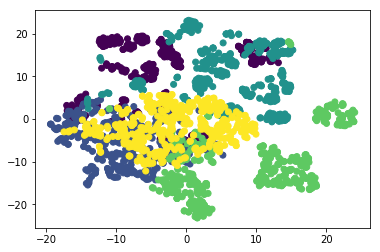

In [29]:
model2 = TSNE(learning_rate=200, n_components=2)
tsne_features = model.fit_transform(dados_print2)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]
plt.scatter(xs, ys, c=np.array(classes))
plt.show()

In [11]:
def plota_maos(dados_print, rang):
    for k in range(rang):
        amostra = dados_print[k]
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111, projection='3d')
        #print(amostra)
        colors = ['blue', 'red', 'yellow', 'green', 'orange']
        idx = 0
        aux = 0
        for i in range(2, len(amostra), 3):
            if aux % 2 == 0 and idx < 4 and aux != 0:
                idx += 1
            ax2.scatter(amostra[i], amostra[i+1], amostra[i+2], color=colors[idx])
            aux += 1

        plt.show()
        print(amostra['Class'])

In [12]:
X = new_dataset.iloc[:, 1:]
y = new_dataset.iloc[:, 0]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def treina_classificador(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    print(knn.score(X_train, y_train))
    print(knn.score(X_test, y_test))

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.preprocessing import Normalizer, MaxAbsScaler 

ks = [1,2,3,4,5,6,7,8]
pca = PCA(n_components=2)
scaler = MaxAbsScaler()
svd = TruncatedSVD(n_components=36)

inertias = []
results = []
for i in ks:
    model = KMeans(n_clusters=i)
    pipeline = make_pipeline(scaler, pca, model)
    pipeline.fit_transform(X)
    labels = pipeline.predict(X)
    results.append((model, labels))
    inertias.append(model.inertia_)

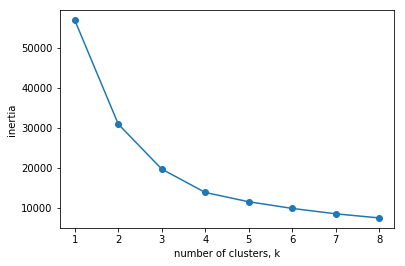

In [15]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [16]:
BEST_VALUE = 4
labels = results[BEST_VALUE - 1][1]
modelx = results[BEST_VALUE - 1][0]
df = pd.DataFrame({'labels': labels, 'classes': y})
ct = pd.crosstab(df['labels'], df['classes'])
print(ct)

classes     1     2     3     4     5
labels                               
0         714  6660  2947  2874  5812
1        7250    43  6533  4830   543
2         854  7928  1678  2668  4307
3        7447   347  5186  4403  5071


In [17]:
from sklearn.metrics import homogeneity_score, silhouette_score, adjusted_rand_score, calinski_harabaz_score
print(homogeneity_score(y, labels))
print(adjusted_rand_score(y, labels))
print(modelx.inertia_)
print(calinski_harabaz_score(X, labels))

0.157234340449
0.117490563614
13889.0005851
10855.3099058


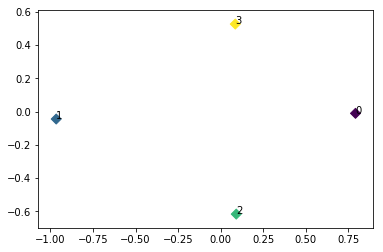

In [18]:
model_plot = results[BEST_VALUE - 1][0]
centroids = model_plot.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig1, ax1 = plt.subplots()
# Make a scatter plot of centroids_x and centroids_y
ax1.scatter(centroids_x, centroids_y, marker='D', s=50, c=list(set(labels)))
for i, txt in enumerate(list(set(labels))):
    ax1.annotate(txt, (centroids_x[i],centroids_y[i]))
plt.show()

8000


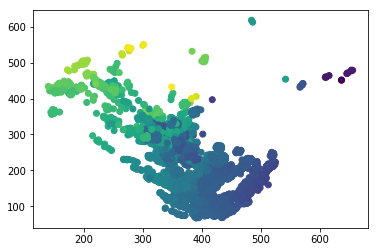

In [19]:
l = []

dic = {0: 0, 1: 0, 2: 0, 3:0, 4:0}
for i in range(len(labels)):
    if dic[labels[i]] < 2000:
        l += [X.iloc[i, :] + labels[i]]
        #l[i].append(labels[i])
        #l[i] = np.array(l[i], dtype=np.float64)
        dic[labels[i]] = dic.get(labels[i], 0) + 1
#l = np.array(l, dtype=np.float64)
print(len(l))
model2 = TSNE(learning_rate=200)
tsne_features = model.fit_transform(l)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]
plt.scatter(xs, ys, c=np.array(l)[:, -1])
plt.show()

In [20]:
treina_classificador(X, labels)

0.973892934274
0.948704019867


In [21]:
BEST_VALUE = 5
labels = results[BEST_VALUE - 1][1]
modelx = results[BEST_VALUE - 1][0]

df = pd.DataFrame({'labels': labels, 'classes': y})
ct = pd.crosstab(df['labels'], df['classes'])
print(ct)


classes     1     2     3     4     5
labels                               
0         520  7853   476   510  1183
1        7491   165  4969  4285  3465
2        7075    28  5758  3319   368
3         672  4113  2799  2690  6852
4         507  2819  2342  3971  3865


In [22]:
from sklearn.metrics import homogeneity_score, silhouette_score, adjusted_rand_score, calinski_harabaz_score
print(homogeneity_score(y, labels))
print(adjusted_rand_score(y, labels))
print(modelx.inertia_)
print(calinski_harabaz_score(X, labels))

0.197152416683
0.138481623787
11567.2742293
8566.59009584


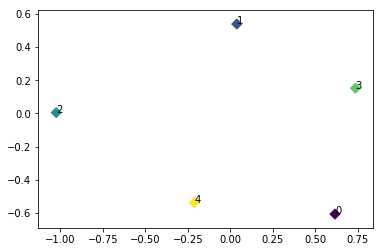

In [23]:
model_plot = results[BEST_VALUE - 1][0]
centroids = model_plot.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig1, ax1 = plt.subplots()
# Make a scatter plot of centroids_x and centroids_y
ax1.scatter(centroids_x, centroids_y, marker='D', s=50, c=list(set(labels)))
for i, txt in enumerate(list(set(labels))):
    ax1.annotate(txt, (centroids_x[i],centroids_y[i]))
plt.show()

10000


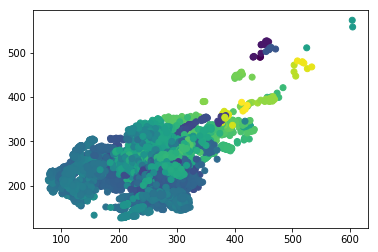

In [24]:
l = []

dic = {0: 0, 1: 0, 2: 0, 3:0, 4:0}
for i in range(len(labels)):
    if dic[labels[i]] < 2000:
        l += [X.iloc[i, :] + labels[i]]
        #l[i].append(labels[i])
        #l[i] = np.array(l[i], dtype=np.float64)
        dic[labels[i]] = dic.get(labels[i], 0) + 1
#l = np.array(l, dtype=np.float64)
print(len(l))
model2 = TSNE(learning_rate=150)
tsne_features = model.fit_transform(l)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]
plt.scatter(xs, ys, c=np.array(l)[:, -1])
plt.show()


In [25]:
treina_classificador(X, labels)

0.963094623779
0.929613534068
